In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("student_merged.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False).head())

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Create binary target variable: 1 = pass, 0 = fail (G3 >= 10)
df['Pass'] = df['G3_mat'].apply(lambda x: 1 if x >= 10 else 0)

# Show distribution of pass/fail
print("\nPass/Fail distribution:")
print(df['Pass'].value_counts())



Missing values:
 school     0
sex        0
age        0
address    0
famsize    0
dtype: int64

Pass/Fail distribution:
Pass
1    255
0    127
Name: count, dtype: int64


                count       mean       std   min    25%   50%   75%   max
school          382.0   0.104712  0.306584   0.0   0.00   0.0   0.0   1.0
sex             382.0   0.481675  0.500319   0.0   0.00   0.0   1.0   1.0
age             382.0  16.586387  1.173470  15.0  16.00  17.0  17.0  22.0
address         382.0   0.787958  0.409290   0.0   1.00   1.0   1.0   1.0
famsize         382.0   0.272251  0.445702   0.0   0.00   0.0   1.0   1.0
Pstatus         382.0   0.900524  0.299693   0.0   1.00   1.0   1.0   1.0
Medu            382.0   2.806283  1.086381   0.0   2.00   3.0   4.0   4.0
Fedu            382.0   2.565445  1.096240   0.0   2.00   3.0   4.0   4.0
Mjob            382.0   2.212042  1.225093   0.0   2.00   2.0   3.0   4.0
Fjob            382.0   2.314136  0.848503   0.0   2.00   2.0   3.0   4.0
reason          382.0   1.235602  1.195789   0.0   0.00   1.0   3.0   3.0
guardian_mat    382.0   0.803665  0.492129   0.0   1.00   1.0   1.0   2.0
traveltime_mat  382.0   1.442408  0.69

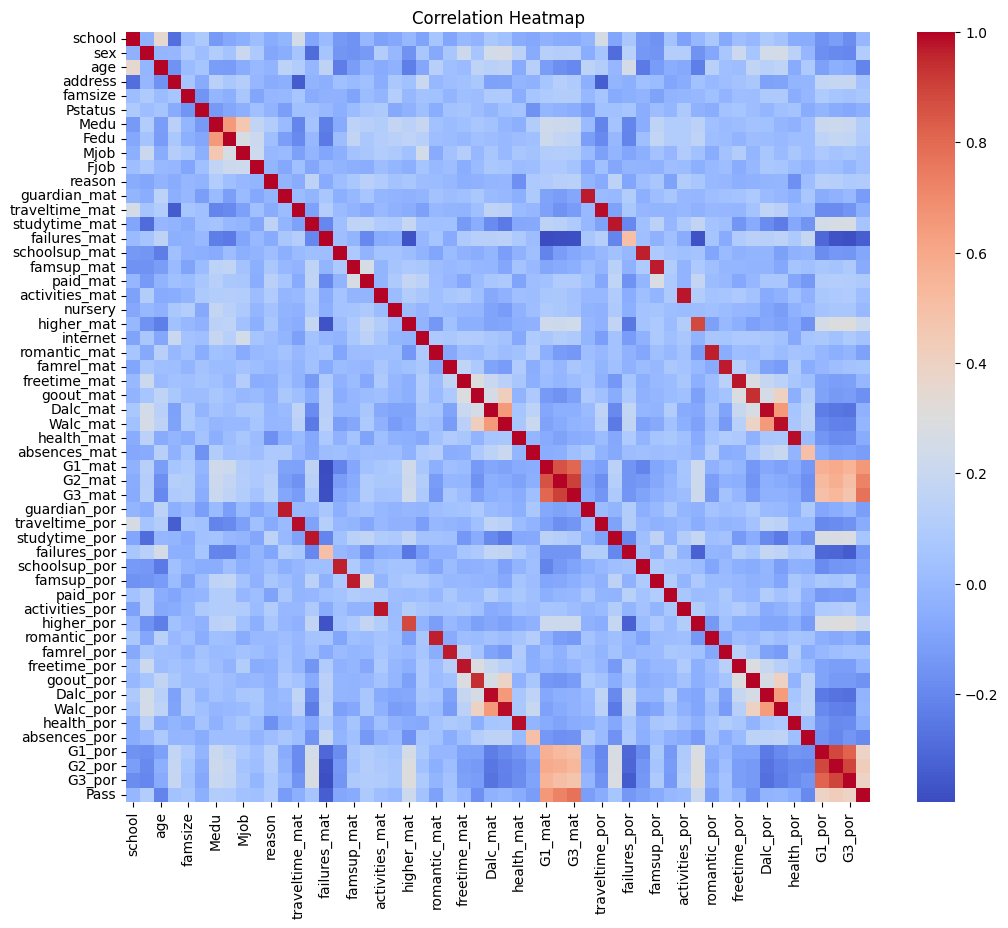

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe().T)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop unneeded columns
X = df.drop(columns=['Pass', 'G3_mat', 'G3_por'])
y = df['Pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model trained successfully.")


Model trained successfully.


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[21  2]
 [ 5 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.96      0.91      0.93        54

    accuracy                           0.91        77
   macro avg       0.88      0.91      0.90        77
weighted avg       0.92      0.91      0.91        77

Accuracy Score: 0.9090909090909091


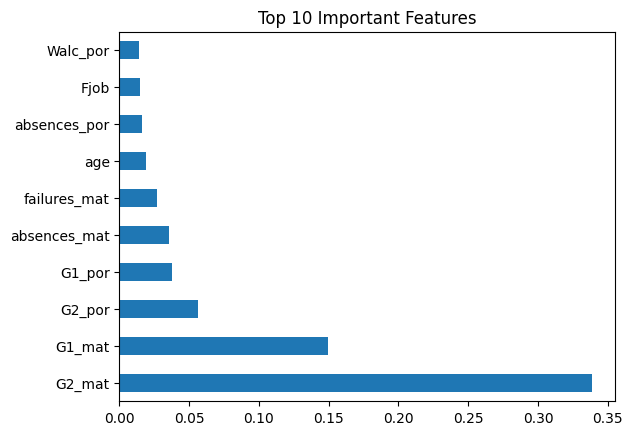

In [9]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [10]:
# Create EngagementScore: combines study time & failures
df['EngagementScore'] = df['studytime_mat'] + (4 - df['failures_mat'])

# Check top 5 students by score
df[['EngagementScore', 'G3_mat']].sort_values(by='EngagementScore', ascending=False).head()


,EngagementScore,G3_mat
71,8,10
69,8,16
333,8,17
70,8,15
330,8,0


In [23]:
columns_to_keep = [
    'sex', 'age', 'studytime_mat', 'failures_mat', 'absences_mat',
    'famsup_mat', 'Dalc_mat', 'Walc_mat', 'G1_mat', 'G2_mat', 'G3_mat', 'Pass'
]
df[columns_to_keep].to_csv("student_powerbi_data.csv", index=False)
